In [10]:
from __future__ import division
from __future__ import print_function

import os
import sys

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [20]:
from sklearn.preprocessing import StandardScaler

In [17]:
import pandas as pd
import numpy as np

In [15]:
from pyod.models.auto_encoder import AutoEncoder
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

In [18]:
# Read data
df_11 = pd.read_csv('/home/ubuntu/Zabbix/Data/SRV_Data/SRV_Processed/SRV-FR-SQLN-11_Processed.csv')

# Missing Value Treatment
df_11 = df_11.set_index('Timestamp').fillna(df_11.mean())
print(df_11.isnull().sum().sum())

0


In [19]:
df_11.shape

(45270, 135)

In [22]:
df_11.head(1)

,Total disk space on K:,Total disk space on J:,Total disk space on N:\LOGS,Total disk space on N:,"SQL Server, Locks: Lock Waits per second (Total)","SQL Server, Buffer Manager: Page reads/sec",Outgoing network traffic on vmxnet3 Ethernet Adapter-WFP Native MAC Layer LightWeight Filter-0000,"SQL Server, Locks: Number of Deadlocks/sec (Total)",Free disk space on V:,Total disk space on Q:\LOGS,...,Total disk space on P:\LOGS,"SQL Server, Locks: Average Wait Time (Total)",Free disk space on R:\LOGS,Free disk space on G:,Free disk space on N:\LOGS,Free disk space on H:\LOGS,Free disk space on Q:,"SQL Server, Memory Manager: Memory Grants Pending",Free disk space on S:,"SQL Server, Cache: Cache Hit Ratio"
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-06-16 05:17:00,8.938692e+11,9.663355e+10,5.365498e+09,2.899071e+11,0.0,0.0,1914432.0,0.0,1.661783e+10,5.365498e+09,...,1.073710e+11,0.0,5.037883e+09,4.036710e+10,3.435790e+09,4.689887e+09,3.090481e+10,0.0,1.396507e+10,81.8883


In [23]:
scaler = StandardScaler()
data = scaler.fit_transform(df_11.values)

In [25]:
data.shape

(45270, 135)

In [37]:
.0001*45217

4.5217

In [39]:
if __name__ == "__main__":
    contamination = 0.0001  # percentage of outliers
    n_train = 45270  # number of training points
    n_test = 2000  # number of testing points
    n_features = 135  # number of features

#     # Generate sample data
#     X_train, y_train, X_test, y_test = \
#         generate_data(n_train=n_train,
#                       n_test=n_test,
#                       n_features=n_features,
#                       contamination=contamination,
#                       random_state=42)

    X_train = data
    X_test = data

    # train AutoEncoder detector
    clf_name = 'AutoEncoder'
    clf = AutoEncoder(epochs=500, contamination=contamination)
    clf.fit(X_train)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 135)               18360     
_________________________________________________________________
dropout_12 (Dropout)         (None, 135)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 135)               18360     
_________________________________________________________________
dropout_13 (Dropout)         (None, 135)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8704      
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 32)               

In [44]:
# get the prediction labels and outlier scores of the training data
data_anomaly_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
data_anomaly_scores = clf.decision_scores_  # raw outlier scores

In [49]:
np.unique(data_anomaly_pred, return_counts=True)

(array([0, 1]), array([45265,     5]))

In [52]:
df_11.index.name

'Timestamp'

In [53]:
df_11['Anomaly'] = pd.Series(data_anomaly_pred, index = df_11.index)

df_11['Anomaly_Score'] = pd.Series(data_anomaly_scores, index = df_11.index)

In [61]:
# looking Anomaly rows

df_11[df_11['Anomaly'] == 1]

,Total disk space on K:,Total disk space on J:,Total disk space on N:\LOGS,Total disk space on N:,"SQL Server, Locks: Lock Waits per second (Total)","SQL Server, Buffer Manager: Page reads/sec",Outgoing network traffic on vmxnet3 Ethernet Adapter-WFP Native MAC Layer LightWeight Filter-0000,"SQL Server, Locks: Number of Deadlocks/sec (Total)",Free disk space on V:,Total disk space on Q:\LOGS,...,Free disk space on R:\LOGS,Free disk space on G:,Free disk space on N:\LOGS,Free disk space on H:\LOGS,Free disk space on Q:,"SQL Server, Memory Manager: Memory Grants Pending",Free disk space on S:,"SQL Server, Cache: Cache Hit Ratio",Anomaly,Anomaly_Score
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-06-21 16:54:00,8.938692e+11,9.663355e+10,5.365498e+09,2.899071e+11,0.0,1164.7894,54432480.0,0.0,6.161638e+10,5.365498e+09,...,5.037883e+09,3.459324e+10,3.435790e+09,4.689887e+09,1.821704e+10,0.0,1.396507e+10,85.3494,1,213.002125
2020-07-03 01:13:00,8.938692e+11,9.663355e+10,5.365498e+09,2.899071e+11,0.0,41.3527,51447504.0,0.0,1.122372e+11,5.365498e+09,...,5.037883e+09,4.030484e+10,3.435790e+09,4.689887e+09,2.874474e+10,0.0,1.396507e+10,87.5270,1,186.401988
2020-07-03 02:55:00,8.938692e+11,9.663355e+10,5.365498e+09,2.899071e+11,0.0,0.0000,17102840.0,0.0,1.122362e+11,5.365498e+09,...,5.037883e+09,4.030484e+10,3.435790e+09,4.689887e+09,2.874474e+10,0.0,1.396507e+10,87.5993,1,155.193892
2020-07-05 04:26:00,8.938692e+11,9.663355e+10,5.365498e+09,2.899071e+11,0.0,5182.2435,2275032.0,0.0,1.117832e+11,5.365498e+09,...,5.037883e+09,4.030484e+10,3.435790e+09,4.689887e+09,2.822046e+10,0.0,1.396507e+10,89.7386,1,171.070935
2020-07-16 01:09:00,8.938692e+11,9.663355e+10,5.365498e+09,2.899071e+11,0.0,0.0000,2012536.0,0.0,1.022852e+11,5.365498e+09,...,5.037883e+09,4.018851e+10,3.210936e+09,4.689887e+09,2.738160e+10,0.0,1.396507e+10,87.5741,1,169.917652


In [62]:
# looking Anomaly rows

df_11[df_11['Anomaly'] == 1].index

Index(['2020-06-21 16:54:00', '2020-07-03 01:13:00', '2020-07-03 02:55:00',
       '2020-07-05 04:26:00', '2020-07-16 01:09:00'],
      dtype='object', name='Timestamp')

In [28]:
#prob_df[ (prob_df['Host'] == 'SRV-FR-SQLN-11') ]#.value_counts()

,Severity,Time,Recovery time,Status,Host,Problem,Duration,Ack,Actions,Tags
55,Information,2020-06-17 21:58:14,2020-06-18 21:32:16,RESOLVED,SRV-FR-SQLN-11,Free disk space is depleting fast on volume V:,23h 34m 2s,No,NaN,NaN
95,High,2020-06-20 14:04:44,2020-06-20 15:47:39,RESOLVED,SRV-FR-SQLN-11,SQL Server - Buffer Manager: Buffer cache hit ...,1h 42m 55s,Yes,"Messages (1), Actions (1)",NaN
353,Information,2020-06-22 12:47:07,2020-06-23 15:49:17,RESOLVED,SRV-FR-SQLN-11,Free disk space is depleting fast on volume V:,1d 3h 2m,No,NaN,NaN
613,Information,2020-06-23 20:56:51,2020-06-24 20:56:51,RESOLVED,SRV-FR-SQLN-11,Free disk space is depleting fast on volume F:,1d,No,NaN,NaN
723,Information,2020-07-01 04:58:51,2020-07-01 05:34:55,RESOLVED,SRV-FR-SQLN-11,Free disk space is depleting fast on volume F:,36m 4s,No,NaN,NaN
738,Average,2020-07-03 21:36:00,NaN,PROBLEM,SRV-FR-SQLN-11,Free disk space is less than 10% on volume L:,27d 14h 51m,Yes,"Messages (1), Actions (1)",NaN
743,High,2020-07-04 14:20:40,2020-07-04 15:35:40,RESOLVED,SRV-FR-SQLN-11,SQL Server - Buffer Manager: Buffer cache hit ...,1h 15m,Yes,"Messages (1), Actions (1)",NaN
789,Information,2020-07-10 18:55:02,2020-07-11 18:28:57,RESOLVED,SRV-FR-SQLN-11,Free disk space is depleting fast on volume L:,23h 33m 55s,No,NaN,NaN


## Plot Anomaly

In [56]:
def anomaly_plot(col_name):
    fig, ax = plt.subplots(figsize=(15,10))


    ax.plot(pd.to_datetime(df_11.index), df_11[col_name] , color='blue', label='Normal', alpha = 0.5)
    ax.scatter(pd.to_datetime(df_11.index), np.where(df_11['Anomaly'] == 1, df_11[col_name], None), color='red', label='Anomaly', alpha = 1)
    

    plt.xlabel('Date')
    plt.ylabel(col_name)
    plt.xticks(rotation = '45')
    plt.legend()
    plt.show();

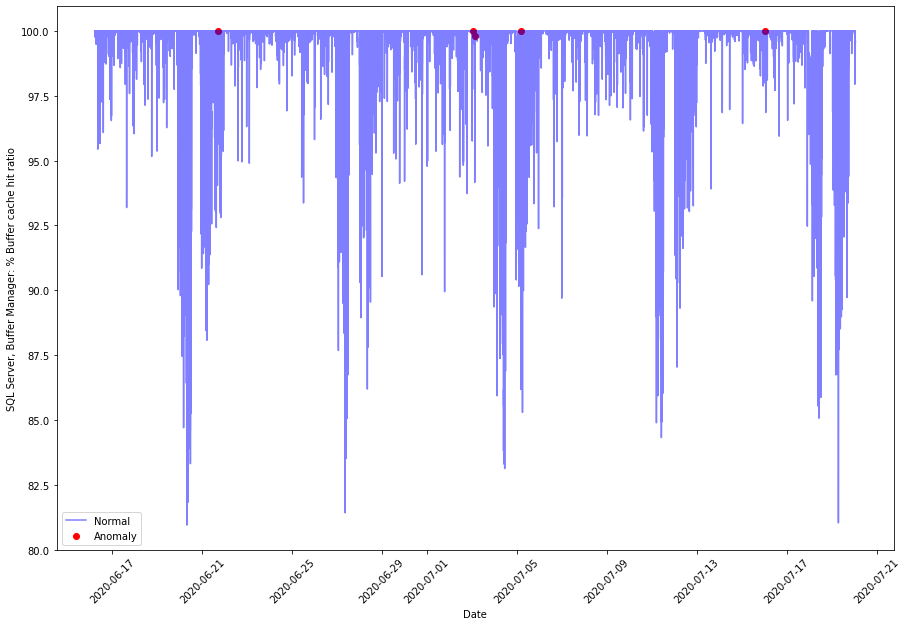

In [59]:
anomaly_plot('SQL Server, Buffer Manager: % Buffer cache hit ratio')

------------------

# Training - 2

In [65]:
50/45270

0.001104484205875856

In [66]:

contamination = 0.001  # percentage of outliers
n_train = 45270  # number of training points
#n_test = 2000  # number of testing points
n_features = 135  # number of features



X_train = data
X_test = data

# train AutoEncoder detector
# clf_name = 'AutoEncoder'
clf_1 = AutoEncoder(epochs=100, contamination=contamination)
clf_1.fit(X_train)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 135)               18360     
_________________________________________________________________
dropout_18 (Dropout)         (None, 135)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 135)               18360     
_________________________________________________________________
dropout_19 (Dropout)         (None, 135)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 64)                8704      
_________________________________________________________________
dropout_20 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 32)               

AutoEncoder(batch_size=32, contamination=0.001, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[64, 32, 32, 64],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x7fb98e961550>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

In [67]:
# get the prediction labels and outlier scores of the training data
data_anomaly_pred_1 = clf_1.labels_  # binary labels (0: inliers, 1: outliers)
data_anomaly_scores_1 = clf_1.decision_scores_  # raw outlier scores

In [68]:
df_11['Anomaly_1'] = pd.Series(data_anomaly_pred_1, index = df_11.index)

df_11['Anomaly_Score_1'] = pd.Series(data_anomaly_scores_1, index = df_11.index)

In [69]:
# looking Anomaly rows

df_11[df_11['Anomaly_1'] == 1].index

Index(['2020-06-17 20:30:00', '2020-06-17 20:34:00', '2020-06-17 20:37:00',
       '2020-06-18 10:42:00', '2020-06-18 10:44:00', '2020-06-19 06:43:00',
       '2020-06-20 23:10:00', '2020-06-21 16:54:00', '2020-06-21 18:51:00',
       '2020-06-22 00:53:00', '2020-06-23 00:04:00', '2020-06-25 00:06:00',
       '2020-06-26 01:14:00', '2020-06-27 01:51:00', '2020-06-27 03:19:00',
       '2020-06-28 10:29:00', '2020-06-30 06:23:00', '2020-06-30 21:36:00',
       '2020-07-01 01:26:00', '2020-07-01 01:57:00', '2020-07-01 16:00:00',
       '2020-07-03 01:13:00', '2020-07-03 02:55:00', '2020-07-03 22:14:00',
       '2020-07-03 23:31:00', '2020-07-05 04:26:00', '2020-07-06 00:38:00',
       '2020-07-06 20:25:00', '2020-07-07 00:53:00', '2020-07-07 00:59:00',
       '2020-07-07 02:01:00', '2020-07-07 02:31:00', '2020-07-07 02:39:00',
       '2020-07-07 12:14:00', '2020-07-09 01:02:00', '2020-07-10 01:25:00',
       '2020-07-10 23:51:00', '2020-07-13 12:36:00', '2020-07-15 10:06:00',
       '2020

In [70]:
def anomaly_plot_1(col_name):
    fig, ax = plt.subplots(figsize=(15,10))


    ax.plot(pd.to_datetime(df_11.index), df_11[col_name] , color='blue', label='Normal', alpha = 0.5)
    ax.scatter(pd.to_datetime(df_11.index), np.where(df_11['Anomaly_1'] == 1, df_11[col_name], None), color='red', label='Anomaly', alpha = 1)
    

    plt.xlabel('Date')
    plt.ylabel(col_name)
    plt.xticks(rotation = '45')
    plt.legend()
    plt.show();

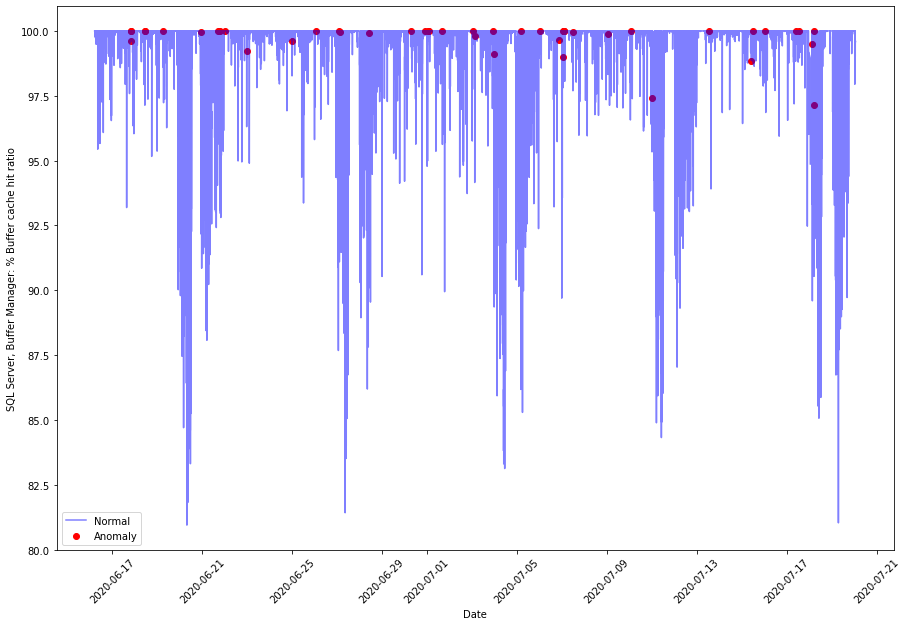

In [71]:
anomaly_plot_1('SQL Server, Buffer Manager: % Buffer cache hit ratio')

# Training - 3 

In [73]:

contamination = 0.01  # percentage of outliers
n_train = 45270  # number of training points
#n_test = 2000  # number of testing points
n_features = 135  # number of features



X_train = data
X_test = data

# train AutoEncoder detector
# clf_name = 'AutoEncoder'
clf_3 = AutoEncoder(epochs=100, contamination=contamination)
clf_3.fit(X_train)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 135)               18360     
_________________________________________________________________
dropout_24 (Dropout)         (None, 135)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 135)               18360     
_________________________________________________________________
dropout_25 (Dropout)         (None, 135)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)                8704      
_________________________________________________________________
dropout_26 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 32)               

AutoEncoder(batch_size=32, contamination=0.01, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[64, 32, 32, 64],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x7fb98e961550>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

In [75]:
# get the prediction labels and outlier scores of the training data
data_anomaly_pred_3 = clf_3.labels_  # binary labels (0: inliers, 1: outliers)
data_anomaly_scores_3 = clf_3.decision_scores_  # raw outlier scores

In [76]:
df_11['Anomaly_3'] = pd.Series(data_anomaly_pred_3, index = df_11.index)

df_11['Anomaly_Score_3'] = pd.Series(data_anomaly_scores_3, index = df_11.index)

In [74]:
def anomaly_plot_gen(df,col_name, anomaly_col):
    fig, ax = plt.subplots(figsize=(15,10))


    ax.plot(pd.to_datetime(df.index), df[col_name] , color='blue', label='Normal', alpha = 0.5)
    ax.scatter(pd.to_datetime(df.index), np.where(df[anomaly_col] == 1, df[col_name], None), color='red', label='Anomaly', alpha = 1)
    

    plt.xlabel('Date')
    plt.ylabel(col_name)
    plt.xticks(rotation = '45')
    plt.legend()
    plt.show();

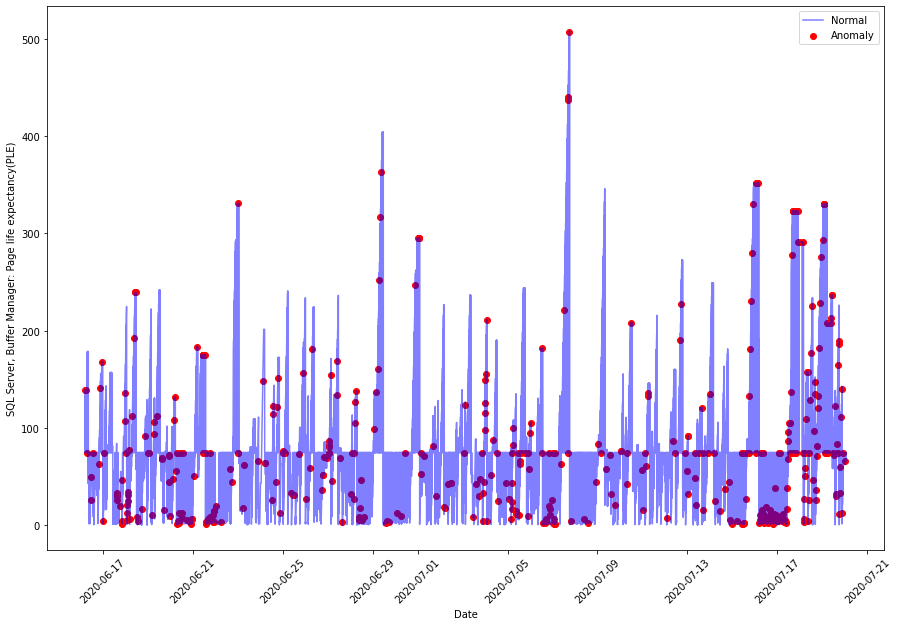

In [85]:
anomaly_plot_gen(df_11,'SQL Server, Buffer Manager: Page life expectancy(PLE)','Anomaly_3') # 'SQL Server, Buffer Manager: % Buffer cache hit ratio'

In [83]:
df_11['Anomaly_3'].value_counts()

0    44817
1      453
Name: Anomaly_3, dtype: int64

In [90]:
df_11[df_11['Anomaly_3'] == 0]['SQL Server, Buffer Manager: Page life expectancy(PLE)'].describe()

count    44817.000000
mean        74.499344
std         77.122481
min          0.000000
25%         17.736900
50%         57.911600
75%         86.517300
max        508.368300
Name: SQL Server, Buffer Manager: Page life expectancy(PLE), dtype: float64

In [89]:
df_11[df_11['Anomaly_1'] == 0]['SQL Server, Buffer Manager: Page life expectancy(PLE)'].describe()

count    45224.000000
mean        74.628678
std         77.318585
min          0.000000
25%         17.703500
50%         58.103300
75%         86.800700
max        508.368300
Name: SQL Server, Buffer Manager: Page life expectancy(PLE), dtype: float64

-----------

In [ ]:
# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

In [27]:
# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:


NameError: name 'y_train' is not defined